In [67]:
# !gdown 1-71hYGVEWoJH3JTtH9CAsSQ6PotpiZBW

In [68]:
from zipfile import ZipFile
password = "57Rk!F8yUz38"
with ZipFile('drive/MyDrive/CombinedNew.zip') as zipObj:
  zipObj.extractall()

In [84]:
import os
import cv2
import shutil
import secrets
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Sequential, Model
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from PIL import Image
from PIL import ImageFile
import seaborn as sns
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as pre_in1
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input 
# from tensorflow.keras.applications.alexnet import AlexNet, preprocess_input

In [70]:
PARENT_PATH = os.getcwd()
DATA_PATH = os.path.join(os.getcwd(),"CombinedNew", "Combined New")
TEST_PATH = os.path.join(DATA_PATH, "test")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
UNSEEN_PATH = os.path.join(DATA_PATH, "unseen")
MODEL_PATH = os.path.join(PARENT_PATH, "models")
NUM_CLASSES = 8

In [71]:
BATCH_SIZE = 64
IMAGE_SIZE = 299
NUM_EPOCH = 25

In [72]:
def create_df(DATA_PATH):
  cls_names = os.listdir(DATA_PATH)
  data = []
  for cls in cls_names: 
    if cls == ".DS_Store":
      continue
    cls_path = os.path.join(DATA_PATH, cls)
    print(cls_path)
    for file in os.listdir(cls_path):
      data.append({"Filename": os.path.join(cls, file), "Class": cls})
  df = pd.DataFrame(data)
  return df
  
train_df = create_df(TRAIN_PATH)
test_df = create_df(TEST_PATH)

/content/CombinedNew/Combined New/train/c5
/content/CombinedNew/Combined New/train/c1
/content/CombinedNew/Combined New/train/c7
/content/CombinedNew/Combined New/train/c4
/content/CombinedNew/Combined New/train/c0
/content/CombinedNew/Combined New/train/c3
/content/CombinedNew/Combined New/train/c6
/content/CombinedNew/Combined New/train/c2
/content/CombinedNew/Combined New/test/c5
/content/CombinedNew/Combined New/test/c1
/content/CombinedNew/Combined New/test/c7
/content/CombinedNew/Combined New/test/c4
/content/CombinedNew/Combined New/test/c0
/content/CombinedNew/Combined New/test/c3
/content/CombinedNew/Combined New/test/c6
/content/CombinedNew/Combined New/test/c2


<Axes: >

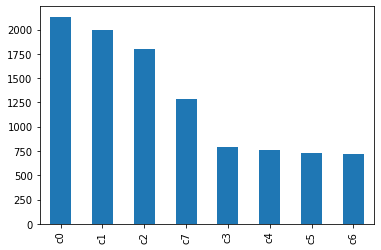

In [73]:
train_df['Class'].value_counts().plot.bar()

<Axes: >

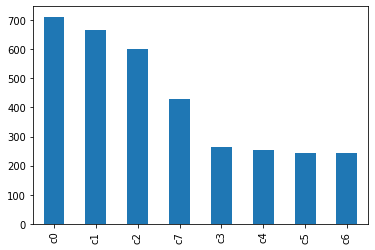

In [74]:
test_df['Class'].value_counts().plot.bar()

In [75]:
# PREP_DATA_PATH = os.path.join(os.getcwd(), "Distracted Driver Dataset","Camera 1 - Prep")
# if os.path.exists(PREP_DATA_PATH):
#   shutil.rmtree(PREP_DATA_PATH)
# shutil.copytree(DATA_PATH, PREP_DATA_PATH)

In [76]:
# def duplicateImg(file):
#   filepath = os.path.join(cls_path, file)
#   new_filepath = os.path.join(cls_path, "new" + file)
#   shutil.copy(filepath, new_filepath)
  
# PREP_TRAIN_PATH = os.path.join(PREP_DATA_PATH, "train")
# PREP_TEST_PATH = os.path.join(PREP_DATA_PATH, "test")
# modify_cls = [ "c2", "c3", "c4", "c5", "c6" , "c7", "c8"]
# for cls in modify_cls:
#   cls_path = os.path.join(PREP_TRAIN_PATH, cls)
#   for file in os.listdir(cls_path): 
#     if (cls != "c2" or cls != "c4"):
#       duplicate = secrets.randbelow(10)
#       if duplicate < 8:
#         duplicateImg(file)
#     else:
#       duplicate = secrets.randbelow(4)
#       if duplicate < 2:
#         duplicateImg(file)

In [77]:
# PREP_TRAIN_PATH = os.path.join(PREP_DATA_PATH, "train")
# PREP_TEST_PATH = os.path.join(PREP_DATA_PATH, "test")
# def dropImg(file):
#   filepath = os.path.join(cls0_path, file)
#   os.remove(filepath)
# cls0_path = os.path.join(PREP_TRAIN_PATH, 'c0')
# for file in os.listdir(cls0_path): 
#   duplicate = secrets.randbelow(2)
#   if duplicate < 1:
#     dropImg(file)

In [78]:
# prep_train_df = create_df(PREP_TRAIN_PATH)
# prep_test_df = create_df(PREP_TEST_PATH)

In [79]:
# prep_train_df['Class'].value_counts().plot.bar()

In [80]:
# prep_test_df['Class'].value_counts().plot.bar()

In [81]:
gen_per_image = 1
gen_per_class = 200
rotation_range = 5
width_shift_range = 0.02
height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

The preprocess_input function resize the image to 299x299 pixels, which was chosen base on the architecture of the InceptionV3 models, so we do not need to resize it anymore

In [85]:
# for inc
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = rotation_range,
        width_shift_range = width_shift_range,
        height_shift_range = height_shift_range,
        shear_range = shear_range,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip,
        fill_mode = fill_mode,
        validation_split = 0.2,
        preprocessing_function = preprocess_input)

unseen_datagen = ImageDataGenerator(
        rescale = 1./255,
)

train_data = datagen.flow_from_directory(TRAIN_PATH,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        class_mode='categorical')

valid_data = datagen.flow_from_directory(TEST_PATH,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        shuffle=True)
unseen_data = unseen_datagen.flow_from_directory(UNSEEN_PATH,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

Found 10225 images belonging to 8 classes.
Found 3414 images belonging to 8 classes.
Found 839 images belonging to 8 classes.


In [86]:
classes = [i for i in range(8)]
print(classes)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_data.classes)
class_weights = dict(enumerate(class_weights.flatten(), 0))
print(class_weights)

[0, 1, 2, 3, 4, 5, 6, 7]
{0: 0.5997770999530737, 1: 0.6390625, 2: 0.7081024930747922, 3: 1.615834386852086, 4: 1.6773293963254594, 5: 1.7605027548209367, 6: 1.7678077455048409, 7: 0.9931041181041181}


In [87]:
base_model_inc = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

for layer in base_model_inc.layers:
    layer.trainable = True

In [88]:
top_models_inc = Sequential()
top_models_inc.add(GlobalAveragePooling2D(input_shape=base_model_inc.output_shape[1:]))
top_models_inc.add(Dense(8, activation='softmax', kernel_initializer='glorot_normal'))
top_models_inc = Model(inputs = base_model_inc.input, outputs = top_models_inc(base_model_inc.output))

top_models_inc.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 149, 149, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00006)
top_models_inc.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [90]:
filepath = os.path.join(MODEL_PATH, "distracted-inception_trainable_best.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max',period=1)
callbacks_list = [checkpoint]

In [91]:
model_history_inc = top_models_inc.fit_generator(train_data,validation_data = valid_data,epochs=NUM_EPOCH, shuffle=True,callbacks=callbacks_list, class_weight=class_weights)


<ipython-input-91-7d869e2dc45f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history_inc = top_models_inc.fit_generator(train_data,validation_data = valid_data,epochs=NUM_EPOCH, shuffle=True,callbacks=callbacks_list, class_weight=class_weights)


Epoch 1/25
160/160 [==============================] - ETA: 0s - loss: 0.6307 - accuracy: 0.7882
Epoch 1: val_accuracy improved from -inf to 0.13445, saving model to /content/models/distracted-inception_trainable_best.hdf5
160/160 [==============================] - 620s 4s/step - loss: 0.6307 - accuracy: 0.7882 - val_loss: 2.3328 - val_accuracy: 0.1344
Epoch 2/25
160/160 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9837
Epoch 2: val_accuracy improved from 0.13445 to 0.22906, saving model to /content/models/distracted-inception_trainable_best.hdf5
160/160 [==============================] - 578s 4s/step - loss: 0.0555 - accuracy: 0.9837 - val_loss: 2.4194 - val_accuracy: 0.2291
Epoch 3/25
160/160 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9936
Epoch 3: val_accuracy improved from 0.22906 to 0.92736, saving model to /content/models/distracted-inception_trainable_best.hdf5
160/160 [==============================] - 567s 4s/step - loss: 

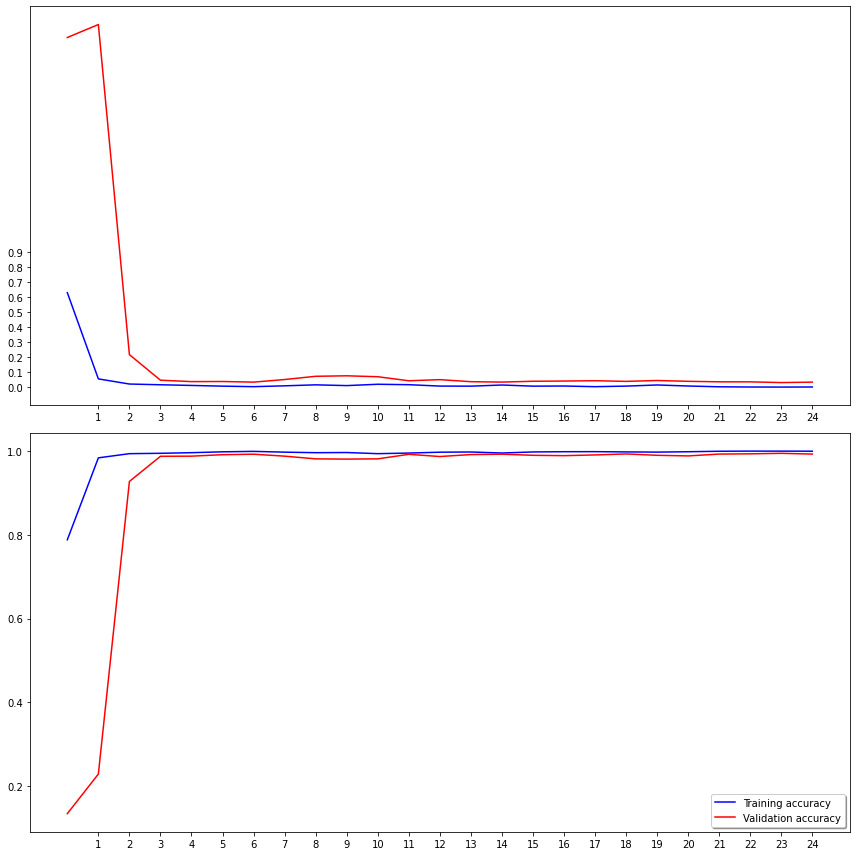

In [92]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history_inc.history['loss'], color='b', label="Training loss")
ax1.plot(model_history_inc.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history_inc.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history_inc.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [93]:
top_models_inc.load_weights('models/distracted-inception_trainable_best.hdf5')

In [94]:
print(top_models_inc)

In [95]:
# evaluate_data = datagen.flow_from_directory(UNSEEN_DATA,
#                                         target_size=(IMAGE_SIZE,IMAGE_SIZE),
#                                         batch_size=BATCH_SIZE,shuffle=False)

In [96]:
ypred = top_models_inc.predict(unseen_data)
print(ypred)
evaluate_list = unseen_data.classes.tolist()
ypred_class = np.argmax(ypred,axis=1)
print(ypred_class)
ytest = evaluate_list

14/14 [==============================] - 18s 1s/step
[[3.63799436e-19 7.03438275e-07 9.68597247e-04 ... 4.15826317e-23
  0.00000000e+00 2.76646024e-04]
 [6.60925995e-19 1.37986831e-06 4.06768231e-04 ... 4.92187459e-22
  0.00000000e+00 1.92336307e-03]
 [2.24712609e-18 1.12350999e-05 2.02909615e-02 ... 1.51187237e-22
  0.00000000e+00 1.08230021e-02]
 ...
 [4.35446059e-13 9.99932051e-01 7.17888952e-07 ... 1.29366802e-22
  0.00000000e+00 6.69679373e-12]
 [3.26296980e-14 9.99987602e-01 4.20154265e-07 ... 5.72670515e-20
  0.00000000e+00 1.70828618e-12]
 [1.06756096e-13 9.99995470e-01 4.58284006e-08 ... 1.95981059e-21
  0.00000000e+00 1.87213569e-12]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 2 3 3 7 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [97]:
accuracy = accuracy_score(ytest,ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(ytest, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(ytest,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.127533
Precision: 0.046302
Recall: 0.127533
F1 score: 0.066346


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
top_models_inc.evaluate(unseen_data)

14/14 [==============================] - 15s 1s/step - loss: 28.9199 - accuracy: 0.1275


[28.91988182067871, 0.12753278017044067]

In [99]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(os.path.join(MODEL_PATH,"confusion_matrix.png"))
    return fig
def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels #sess.run(tf.argmax(n_labels, 1))
    predictions = n_predictions #sess.run(tf.argmax(n_predictions, 1))

#     confusion_matrix = sess.run(tf.contrib.metrics.confusion_matrix(labels, predictions))
    matrix = confusion_matrix(labels,predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

In [100]:
class_names = list()
for name,idx in valid_data.class_indices.items():
    class_names.append(name)
print(class_names)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']


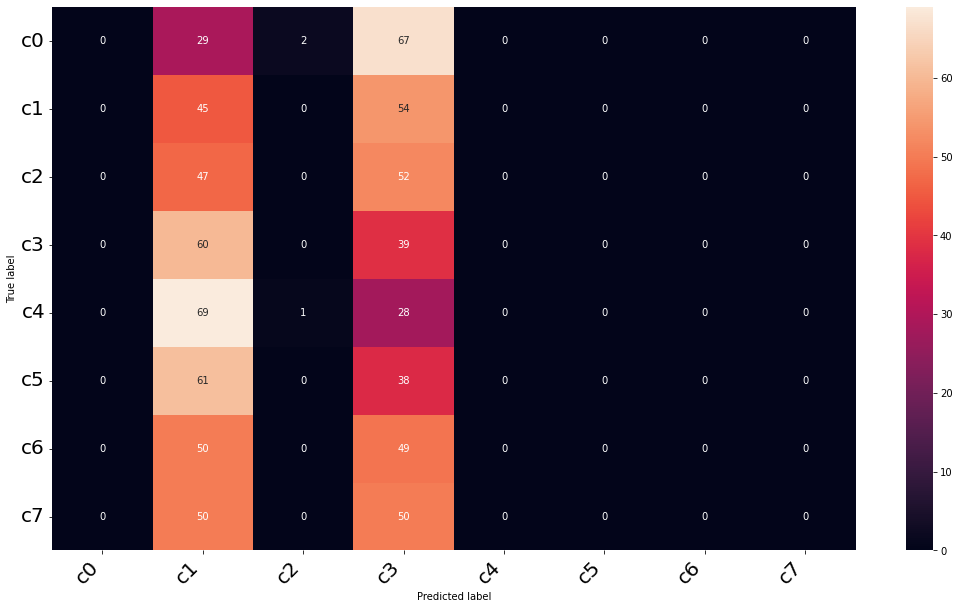

In [101]:
print_heatmap(ytest,ypred,class_names)